$\Huge Computational$ $\Huge Intelligence$ $\Huge Lab$

$\Huge  Assignment$ $\Huge 1$
---
Joanna Wójcicka, gr.2
---

# 1.1 Function
Consider the following Python class.

In [7]:
import numpy as np

class Function:
  def __init__(self,n_h,activation=lambda x : x):
    self.f=activation
    self.W0=np.random.randn(n_h,1)*np.sqrt(1/n_h)
    self.b0=np.zeros((n_h,1))
    self.W1=np.random.randn(1,n_h)*np.sqrt(1/n_h)
    self.b1=np.zeros((1,1))

  def __call__(self,x):
    z=self.W0*x+self.b0
    a  = self.f(z)
    y=np.dot(self.W1,a)+self.b1
    return y[0]

x=np.linspace(0,10,100)
f=Function(4)
y=f(x)

In [4]:
y

array([ 0.        , -0.01813796, -0.03627593, -0.05441389, -0.07255186,
       -0.09068982, -0.10882778, -0.12696575, -0.14510371, -0.16324168,
       -0.18137964, -0.1995176 , -0.21765557, -0.23579353, -0.25393149,
       -0.27206946, -0.29020742, -0.30834539, -0.32648335, -0.34462131,
       -0.36275928, -0.38089724, -0.39903521, -0.41717317, -0.43531113,
       -0.4534491 , -0.47158706, -0.48972503, -0.50786299, -0.52600095,
       -0.54413892, -0.56227688, -0.58041485, -0.59855281, -0.61669077,
       -0.63482874, -0.6529667 , -0.67110466, -0.68924263, -0.70738059,
       -0.72551856, -0.74365652, -0.76179448, -0.77993245, -0.79807041,
       -0.81620838, -0.83434634, -0.8524843 , -0.87062227, -0.88876023,
       -0.9068982 , -0.92503616, -0.94317412, -0.96131209, -0.97945005,
       -0.99758802, -1.01572598, -1.03386394, -1.05200191, -1.07013987,
       -1.08827783, -1.1064158 , -1.12455376, -1.14269173, -1.16082969,
       -1.17896765, -1.19710562, -1.21524358, -1.23338155, -1.25

Operations placed in the function call operator can be expressed as:


*   $z = W_0\cdot x+b_0$
*   $a = f(z)$
*   $y = W_1*a+b_1$  

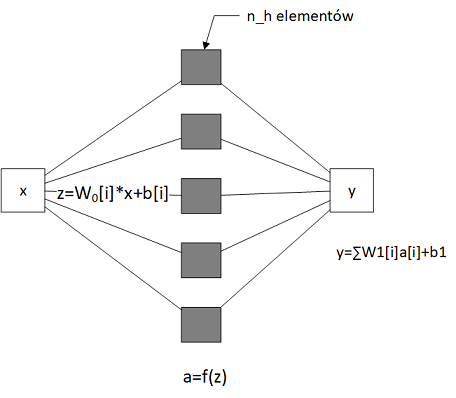

**TODO 1.1.1** Create function objects for various values of ```n_h``` and display their shapes. Use a for loop

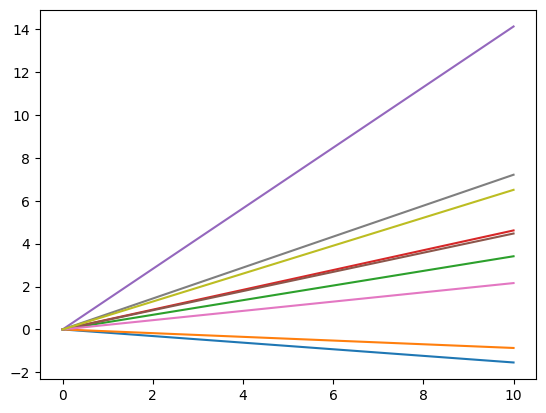

In [8]:
import matplotlib.pyplot as plt
for i in range(1, 10):
    plt.plot(x, Function(i)(x))

Run the following code.

**Question: What are the shapes of function graphs? Why there are multiple plots?**

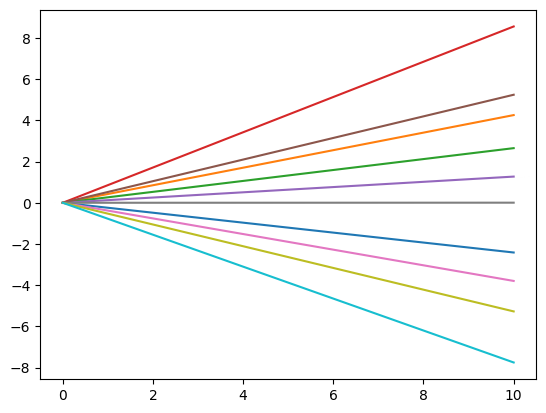

In [9]:
for i in range(10):
  plt.plot(x,Function(5)(x))

**TODO 1.1.2** Define two functions:

*   $sigmoid(x)=\frac{1}{1+exp(-x)}$
*   $rbf(x)=exp(-x^2)$



In [11]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def rbf(x):
  return np.exp(-x**2)

then plot their graphs

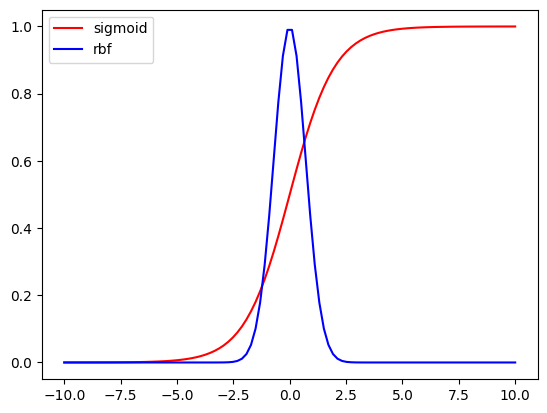

In [12]:
import matplotlib.pyplot as plt
x=np.linspace(-10,10,100)

plt.plot(x,sigmoid(x),c='r',label='sigmoid')
plt.plot(x,rbf(x),c='b',label='rbf')
plt.legend()

**TODO 1.1.3** Display several function plots for activation = sigmoid

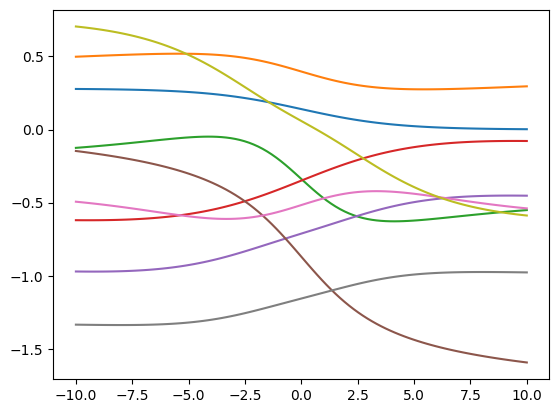

In [13]:
for i in range(1, 10):
    plt.plot(x, Function(i, activation=sigmoid)(x))

**TODO 1.1.4** Display several function plots for activation = rbf

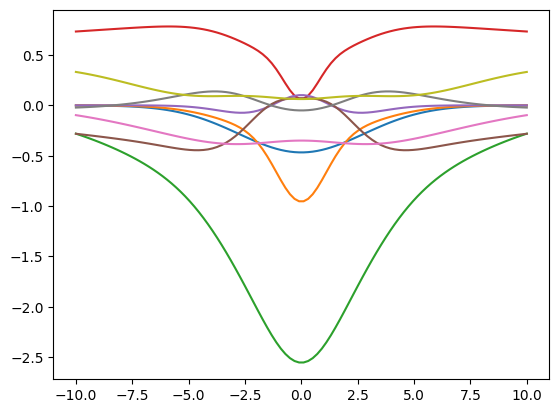

In [14]:
for i in range(1, 10):
    plt.plot(x, Function(i, activation=rbf)(x))

# 1.2 Implementation based on TensorFlow

In [16]:
import tensorflow as tf
print(tf.__version__)

ImportError: Traceback (most recent call last):
  File "C:\Users\Joanna\Documents\coding\Computational Intelligence\.venv\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [ ]:
class Function:
  def __init__(self,n_h,activation = lambda x:x):
    self.f = activation
    self.W0=tf.Variable(np.random.randn(n_h,1)*np.sqrt(1/n_h))
    self.b0=tf.Variable(np.zeros((n_h,1)))
    self.W1=tf.Variable(np.random.randn(1,n_h)*np.sqrt(1/n_h))
    self.b1=tf.Variable(np.zeros((1,1)))


  def __call__(self,x):
    z=self.W0*x+self.b0
    # a=sigmoid(z)
    a=self.f(z)
    y=tf.matmul(self.W1,a)+self.b1
    return y

Run the cell below several times. Each time the function shape changes.

In [ ]:
x=np.linspace(0,10,100)
f=Function(10,activation=rbf)
y=f(x)
plt.plot(x,y.numpy()[0])

## How to fit the model to a given function?

We need
1.   A measure to evaluate model fitness
2.   A loss function to find the optimal model
3.   Loss function may be identical to measure (but does not have to)
4. An optimization procedure that minimizes the loss











**TODO 1.2.1** Analyze the code in the cell below and complete the code of MSE function. MSE means Mean Squared Error  

In [ ]:
a = tf.Variable([1.0,2.0,3.0,4.5])
b = tf.Variable([1.0,2.1,3.8,4.0])
e = (a-b)**2

print(e)
mse=...
print(mse)

In [ ]:
def tf_MSE(y_true,y_pred):
  e = (y_true - y_pred)**2
  return tf.math.reduce_sum(e)/e.shape[0]

**TODO 1.2.2** Rewrite sigmoid and rbf functions using  TensorFlow

In [ ]:
def tf_sigmoid(x):
  ...

def tf_rbf(x):
  ...


## The fit method

* Input: x and y
* Iterates multiple times (parameter epoch)
* In each iteration
  * Calculates y_pred = model(x)
  * Computes loss function
  * Computes gradient of loss function with respect to weights
  * Updates weights, basicaly according to the formula $W=W-gradient*learning\_rate$.
  * Actually uses an optimizer that performs this in a smarter way  




In [ ]:
import tensorflow as tf


class Function:
  def __init__(self,n_h,activation = lambda x:x):
    self.f = activation
    self.W0=tf.Variable(np.random.randn(n_h,1)*0.01)
    self.b0=tf.Variable(np.zeros((n_h,1)))
    self.W1=tf.Variable(np.random.randn(1,n_h)*0.01)
    self.b1=tf.Variable(np.zeros((1,1)))


  def __call__(self,x):
    z=self.W0*x+self.b0
    a=self.f(z)
    y=tf.matmul(self.W1,a)+self.b1
    return y


  def fit(self,x,y,epochs=10,optimizer = tf.keras.optimizers.RMSprop()):
    for i in range(epochs):
      with tf.GradientTape() as tape:
        y_pred=self(x)
        loss = tf_MSE(y_pred,y)
        # print(loss)
        variables=(self.W0,self.b0,self.W1,self.b1)
        gradients = tape.gradient(loss, variables)
        # print(gradients)
        optimizer.apply_gradients(zip(gradients, variables))


We will try to fit our model (Function class) to the polynomial  $y=(x-1)(x-6)(x-7)$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,10,100)
y = (x-1)*(x-6)*(x-7)

plt.scatter(x,y)
plt.grid()


Although the problem is super-easy for methods numerical analysis, using this approach is a little bit hard. We need many hidden units and iterations... (execution abot 90 sec)

**TODO 1.2.3** Create a model (Function) object passing as parameters 50 hidden units and rbf activation function. Fit the model setting number of iterations to 5000.

In [ ]:

f=...
f.fit...

plt.plot(x,y)
plt.grid()

y_pred=f(x)
plt.plot(x,y_pred.numpy()[0])


**Hyperparameters**
*  n_h (number of hidden neurons) controls the model complexity
*  activation function - influences the model performance
*  epochs - controls number of iterations (influences the learning algorithm)


# 1.3 Implementation based on Pytorch

**TODO 1.3.1** Write functions  `torch_rbf` and `torch_MSE`

In [ ]:
import torch

def torch_rbf(x):
    ...

x = torch.tensor([1.0, 2.0])

print(torch_rbf(x))


In [ ]:
def torch_MSE(y_pred, y_true):
    ...


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim




class Function(nn.Module):
    def __init__(self, n_h, activation=lambda x: x):
        super(Function, self).__init__()
        self.f = activation

        # nn.Parameter (analog of tf.Variable)
        self.W0 = nn.Parameter(torch.randn(n_h, 1) * 0.1)
        self.b0 = nn.Parameter(torch.zeros(n_h, 1))
        self.W1 = nn.Parameter(torch.randn(1, n_h) * 0.1)
        self.b1 = nn.Parameter(torch.zeros(1, 1))

    def forward(self, x):
        z = self.W0 @ x + self.b0   # computes: W0 * x + b0
        a = self.f(z)               # activation
        y = self.W1 @ a + self.b1   # computes: W1 * a + b1
        return y


    def fit(self, x, y, epochs=10, optimizer=None):
        if optimizer is None:
            optimizer = optim.RMSprop(self.parameters())

        for i in range(epochs):
            optimizer.zero_grad()         # sets gradients to 0
            y_pred = self.forward(x)
            loss = torch_MSE(y_pred, y)
            loss.backward()               # gradient computation
            optimizer.step()              # applying gradients to weights
            # print(loss.item())




In [ ]:
model = Function(n_h=50, activation=torch_rbf)

x = np.linspace(0,10,100)
y = (x-1)*(x-6)*(x-7)

x_t = torch.tensor(x, dtype=torch.float32).unsqueeze(0)
y_t = torch.tensor(y, dtype=torch.float32).unsqueeze(0)
model.fit(x_t, y_t, epochs=5000)

y_pred = model(x_t)
print(y_pred)

In [ ]:
plt.plot(x,y)
plt.grid()

plt.plot(x,y_pred.detach().numpy()[0])


# 1.4 TensorFlow: neural network model

Analogous model can be built using components of tensorflow.keras library.

*  **Advantage** the computations are converted to form a *computational graph* that can be executed much faster. Also on GPU. This is done with ```compile``` method.

In [ ]:
from keras import models
from keras import layers

def build_model(n_h):
  model = models.Sequential()
  model.add(layers.Input(shape=(1,)))
  model.add(layers.Dense(n_h, activation=tf_rbf))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mse','mae'])
  return model



**TODO 1.4.1** Create a model with 50 hidden units and call fit function setting number of epochs 5000 and batch_size (another hyperparameter) to 100

In [ ]:
import numpy as np
x = np.linspace(0,10,100)
y = (x-1)*(x-6)*(x-7)

model = ...
model.summary()
history = ...


Check plots of original and fit curves

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(x,y)
plt.grid()

y_pred=model.predict(x)
plt.plot(x,y_pred)

**TODO 1.4.2** Repat the above steps changing hyperparameters to get a good fit

During training some data are collected. We may display various measures residing in the training history

In [ ]:
import matplotlib.pyplot as plt

plt.title('Training history - MSE')
plt.plot(history.history['mse'],label='mse')
plt.xlabel('iteration')
plt.ylabel('MSE')
plt.legend()

# history.history['mse']

# 1.5 PyTorch: Neural network model

In PyTorch activation function is a separate layer


Information on loss should be explicitely collected

```
history = {'loss': []}

for epoch in range(epochs):
    ...
    history['loss'].append(loss.item())
    
```

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# --- RBF Layer ---
class RBF(nn.Module):
    def forward(self, x):
        return torch.exp(-x**2)



In [ ]:
class SimpleRBFNN(nn.Module):
    def __init__(self, n_h):
        super().__init__()
        self.hidden = nn.Linear(1, n_h)
        self.rbf = RBF()
        self.out = nn.Linear(n_h, 1)

    def forward(self, x):
        x = self.hidden(x)
        x = self.rbf(x)
        x = self.out(x)
        return x


In [ ]:
# datatype and shape conversion
x = np.linspace(0, 10, 100).reshape(-1, 1).astype(np.float32)
y = ((x - 1)*(x - 6)*(x - 7)).astype(np.float32)

x_tensor = torch.from_numpy(x)
y_tensor = torch.from_numpy(y)

# --- Model, optimizer, loss ---
model = SimpleRBFNN(n_h=50)
optimizer = optim.RMSprop(model.parameters())
loss_fn = nn.MSELoss()

# --- Trening ---
epochs = 5000
history = {'loss': []}

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_tensor)
    loss = loss_fn(y_pred, y_tensor)
    loss.backward()
    optimizer.step()

    history['loss'].append(loss.item())

    if (epoch+1) % 1000 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.6f}")

# --- Sprawdzenie wyników ---
with torch.no_grad():
    y_pred = model(x_tensor)



**prior to conversion to numpy, gradients should be detached ...**

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

plt.plot(x,y)
plt.grid()

y_pred=model(x_tensor).detach().numpy()
plt.plot(x,y_pred)

In [ ]:
plt.plot(history['loss'])

# 1.6 More realistic problem
The task of perfectly fitting a known function is very rare.

*  It is rather assumed that we have data that originate from a true underlaying function with a noise $y=f(x)+\varepsilon$
*  It is also often assumed that $\varepsilon \sim N(0,\sigma)$

In [ ]:
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

n_size=100
x = np.linspace(0,10,n_size)
y = (x-1)*(x-6)*(x-7)+np.random.normal(0,10,n_size)

plt.scatter(x,y)
plt.plot(x,(x-1)*(x-6)*(x-7),color='g')



## 1.6.1 Tensorflow

**TODO 1.6.1** Fit the model to this DATA using the best hyperparameters obtained before

In [ ]:
model = ...
history = ...

**TODO 1.6.2** Plot the scattered data, true function in green and predictions in red

## 1.6.2 Pytorch

**TODO 1.6.3** Write analogous code using PyTorch library. Select number of epochs providing the best results (no underfitting / overfitting. Plot the results.

Collect information on loss and display it.



In [ ]:
# Example 1

In [ ]:
# Example 2

In [ ]:
# Example 3

# 1.7 Validating model - training and testing

Typical ML workflow includes training the model and testing its performance on unseen data.

* **Why** - to control and assess generalization error which may result from
    * underfitting - the model is to simple or not trained enough
    * overfitting - the model is too complex, matches perfectly the training data (see part of the plot on the left)  

We will split the data into two subsets

In [ ]:
from sklearn.model_selection import train_test_split

x = np.linspace(0,10,n_size)
y = (x-1)*(x-6)*(x-7)+np.random.normal(0,10,n_size)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)


## 1.7.1 TensorFlow

**TODO 1.7.1** Fit the TensorFlow model using x_train and y_train, set the parameter ```validation_data=(x_test, y_test)```

Warning: training lasts up to 250 sec

We will display true function, noisy data and predictions

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x,(x-1)*(x-6)*(x-7),color='g')
y_pred=model.predict(x_test)
plt.scatter(x_test,y_pred,color='r')
# plt.plot(x_test,y_pred,color='r')

Lets peek what is the content of the history...

In [ ]:
for k in history.history:
  print(k)

**TODO 1.7.2** Display loss (training loss) and val_loss (validation loss on the test set)

## 1.7.2 PyTorch
**TODO 1.7.3** Perform analogous task using PyTorch.

While evaluating model on test data you should not compute gradients. The typical code snippet is:

```
    # Within the traing loop
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_test)
        val_loss = loss_fn(y_val_pred, y_test)

```
See also: https://stackoverflow.com/questions/60018578/what-does-model-eval-do-in-pytorch

In [ ]:
x_train = x_train.reshape(-1, 1).astype(np.float32)
y_train = y_train.reshape(-1, 1).astype(np.float32)

x_test = x_test.reshape(-1, 1).astype(np.float32)
y_test = y_test.reshape(-1, 1).astype(np.float32)

x_tensor_train = torch.from_numpy(x_train)
y_tensor_train = torch.from_numpy(y_train)

x_tensor_test = torch.from_numpy(x_test)
y_tensor_test = torch.from_numpy(y_test)

# --- Model, optimizer, loss ---
model = SimpleRBFNN(n_h=50)
optimizer = optim.RMSprop(model.parameters())
loss_fn = nn.MSELoss()

# --- Traning ---


In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x,(x-1)*(x-6)*(x-7),color='g')
y_pred=model(x_tensor_test)
plt.scatter(x_test,y_pred.detach().numpy(),color='r')
# plt.plot(x_test,y_pred,color='r')

In [ ]:
plt.plot(history['loss'],label='train loss')
plt.plot(history['val_loss'],label='validation loss')
plt.legend()

# 1.8 Classification
Function models can be used for classification, provided we constrain them to return probabilities, i.e.  values from [0,1] interval.

* Function with one output may be used for binary classification:
  *  Assign $label_0$ if $f(x) <0.5$
  *  Assign $label_1$ if $f(x) \ge 0.5$

**TODO 1.8.1** Which function converts $R \to [0,1]$? Answer the question

In [ ]:
import matplotlib.pyplot as plt
x=np.linspace(-10,10,100)

plt.plot(x,(lambda x: 1/(1+np.exp(-x)))(x),c='r')

We will generate a dataset. Points above the previously used polynomial will have blue label, the points below red.

In [ ]:
X = np.random.rand(1000,2)*[10,150]-[0,40]
y = np.where(X[:,1]>(X[:,0]-1)*(X[:,0]-6)*(X[:,0]-7),1,0)
# y.shape

from matplotlib.colors import ListedColormap
cm = ListedColormap(['r', 'b'])
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm)

We will biuld a model more suitable for classification.

What is binary_crossentropy aka. logloss?

$loss_i= -[ y_i\cdot ln(p_i) + (1-y_i)\cdot ln(1-p_i)]$

You may google the term...

$p_i=f(x_1)$

$y_i = 1 → p_i = 1 (.9)$

$y_i = 0 → p_i = 0 (.1)$



## 1.8.1 Classification in TensorFlow

In [ ]:
import tensorflow as tf


def build_classification_model(n_h):
  model = models.Sequential()
  model.add(layers.Input(shape=(2,)))
  model.add(layers.Dense(n_h, activation='relu'))
  model.add(layers.Dense(n_h, activation='relu'))
  model.add(layers.Dense(1,activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model



**TODO 1.8.2** fit the model using training data. Set about 100 epochs, use X_test and y_test as validation data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)



Display predictions and the polynomial curve which was used to separate class instances.

In [ ]:
y_pred = model.predict(X_test)
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred,cmap=cm)
x = np.linspace(0,10,100)
y = (x-1)*(x-6)*(x-7)
plt.plot(x,y,color='g')

In [ ]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend()

## 1.8.1 Classification in Pytorch

**TODO 1.8.3** Build PyTorch model with the same architecture as TensorFlow. Split X,y dataset to train and test data. Train the model and collect loss and validation loss in the history dictionary. Display plots.



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# --- Model ---
class ClassificationModel(nn.Module):
    def __init__(self, n_h):
        super().__init__()
        self.hidden1 = nn.Linear(2, n_h)     # Input (2) -> n_h
        self.hidden2 = nn.Linear(n_h, n_h)   # n_h -> n_h
        self.out = nn.Linear(n_h, 1)         # n_h -> 1
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.hidden1(x))   # 1. Dense + ReLU
        x = ...   # 2. Dense + ReLU
        x = ...    # Output + Sigmoid
        return x



In [ ]:
X = np.random.rand(1000,2)*[10,150]-[0,40]
y = np.where(X[:,1]>(X[:,0]-1)*(X[:,0]-6)*(X[:,0]-7),1,0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [ ]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

# Reshape y_train and y_test to match the model output shape
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# --- Model, optimizer, loss ---
model = ClassificationModel(n_h=32)
optimizer = optim.Adam(model.parameters())
loss_fn = nn.BCELoss()



In [ ]:
y_pred = model(X_test)
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred.detach().numpy(),cmap=cm)
x = np.linspace(0,10,100)
y = (x-1)*(x-6)*(x-7)
plt.plot(x,y,color='g')

In [ ]:
plt.plot(history['loss'],label='train loss')
plt.plot(history['val_loss'],label='validation loss')
plt.legend()